<a href="https://colab.research.google.com/github/ayodejipops/ayodejipops/blob/main/Train(working).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
train_df = pd.read_csv("C:/Users/DELL/Desktop/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
train_df2 = train_df.copy()
train_df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df2["AgeGroup"] = " "
for value in train_df2.Age:
    if value < 18:
        train_df2.loc[train_df2["Age"]==value, "AgeGroup"]="young"
    elif value >= 18:
        train_df2.loc[train_df2["Age"]==value, "AgeGroup"]="old"
    elif value==None:
        train_df2.loc[train_df2["Age"]==value, "AgeGroup"]="Null"
        
train_df2.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,old
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,old
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,old
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,old
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,old
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,old
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,young
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,old
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,young


In [ ]:
train_df2.AgeGroup.unique()

array(['old', ' ', 'young'], dtype=object)

In [ ]:
age_group_count = [x for x in (train_df[train_df2.AgeGroup=="young"]["Name"].count(), 
                         train_df[train_df2.AgeGroup=="old"]["Name"].count(), 
                         train_df[train_df2.AgeGroup==' ']["Name"].count())]
labels=["Young", "Old", " NoData"]
age_group_count

[113, 601, 177]

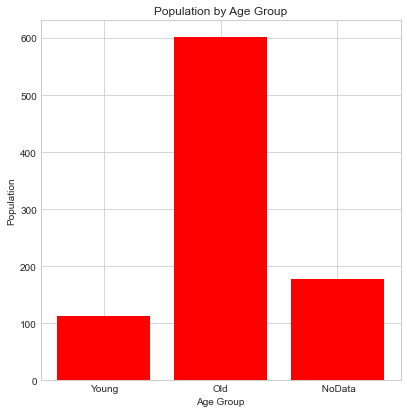

In [ ]:
plt.style.use("seaborn-whitegrid")
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, age_group_count,color='r')
ax.set_xlabel("Age Group")
ax.set_ylabel("Population")
ax.set_title("Population by Age Group", )
plt.show()

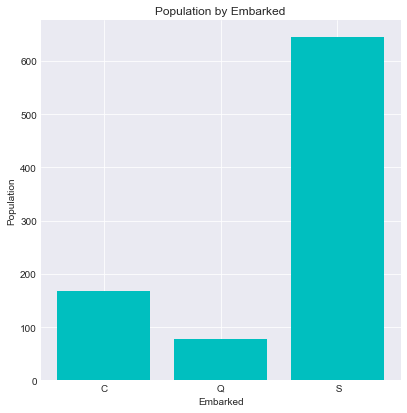

In [ ]:
embarked_group_count = [x for x in (train_df[train_df2.Embarked=="C"]["Name"].count(), 
                         train_df[train_df2.Embarked=="Q"]["Name"].count(), 
                         train_df[train_df2.Embarked=="S"]["Name"].count())]
labels=["C", "Q", " S"]
ax.set_xlabel("Embarked")
ax.set_ylabel("Population")

plt.style.use("seaborn-darkgrid")
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, embarked_group_count,color='c')
ax.set_title("Population by Embarked", )
plt.show()

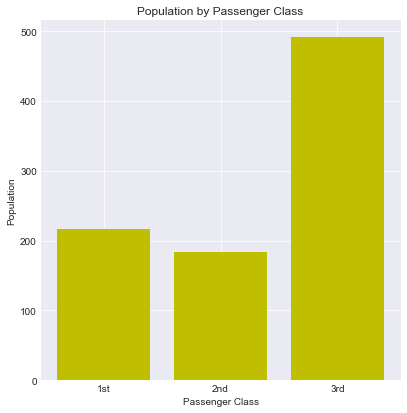

In [ ]:
class_count = [x for x in (train_df[train_df2.Pclass==1]["Name"].count(), 
                         train_df[train_df2.Pclass==2]["Name"].count(), 
                         train_df[train_df2.Pclass==3]["Name"].count())]
labels=["1st", "2nd", "3rd"]

plt.style.use("seaborn-darkgrid")
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, class_count,color='y')
ax.set_xlabel("Passenger Class")
ax.set_ylabel("Population")
ax.set_title("Population by Passenger Class", )
plt.show()

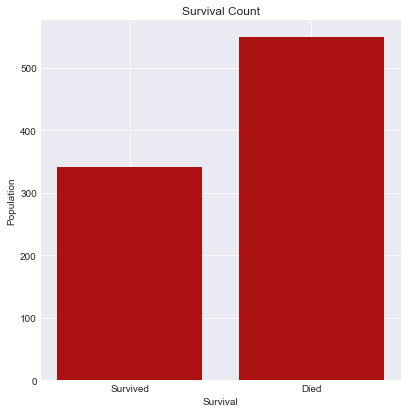

In [ ]:
survival_count = [x for x in (train_df[train_df2.Survived==1]["Name"].count(), 
                         train_df[train_df2.Survived==0]["Name"].count())]
labels=["Survived", "Died"]

plt.style.use("seaborn-darkgrid")
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, survival_count,color='#ab1211')
ax.set_xlabel("Survival")
ax.set_ylabel("Population")
ax.set_title("Survival Count", )
plt.show()

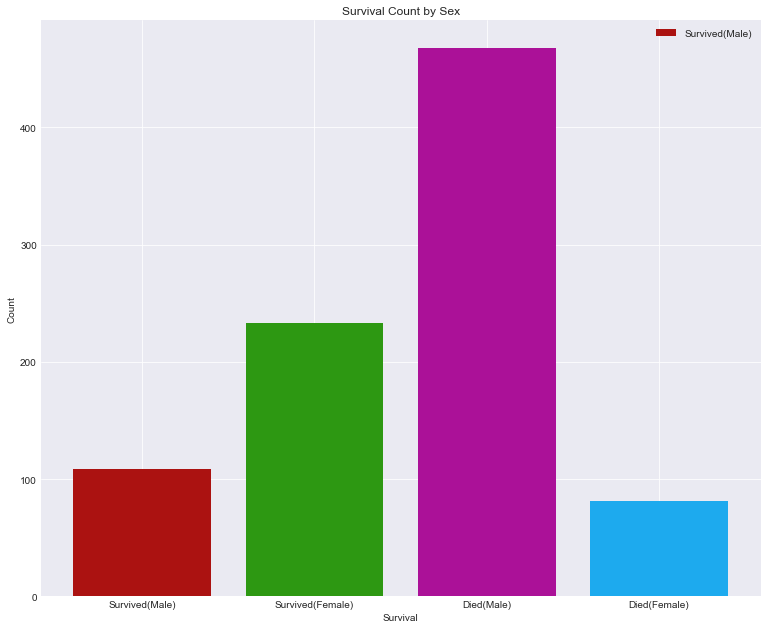

In [ ]:
survival_count = [x for x in (train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male")]["Name"].count(), 
                         train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="female")]["Name"].count(),
                             train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male")]["Name"].count(),
                             train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="female")]["Name"].count())]
labels=["Survived(Male)", "Survived(Female)", "Died(Male)", "Died(Female)"]

plt.style.use("seaborn-darkgrid")
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, survival_count, color=('#ab1211', '#2d9812', '#ab1198', '#1daaee'))
ax.set_xlabel("Survival")
ax.set_ylabel("Count")
ax.set_title("Survival Count by Sex" )
ax.legend(labels)
plt.show()

# Survival By Sex Analysis

## Male Survival Analysis

* by age group
* by class
* by embarked
* by sibsp
* by parch

***

### By Age Group

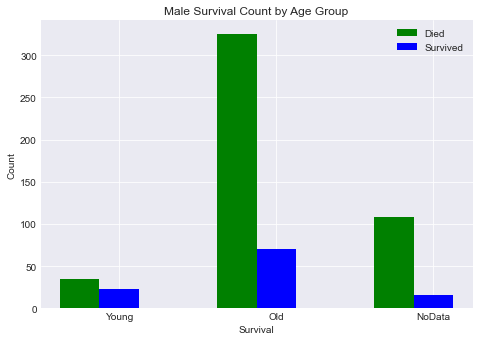

In [ ]:
death_count = [x for x in (train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.AgeGroup=="young")]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.AgeGroup=="old")]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.AgeGroup==" ")]["Name"].count())]

survival_count = [x for x in (train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.AgeGroup=="young")]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.AgeGroup=="old")]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.AgeGroup==" ")]["Name"].count())]

data = [death_count, survival_count]

# labels=["Survived(Male)", "Survived(Female)", "Died(Male)", "Died(Female)"]

plt.style.use("seaborn-darkgrid")
fig = plt.figure()
X = np.arange(3)
ax = fig.add_axes([0,0,1,1])
ax.bar(X+0.00, data[0], color='g', width=0.25)
ax.bar(X+0.25, data[1], color='b', width=0.25)
ax.set_xticks([0.25,1.25,2.25])
ax.set_xticklabels(["Young", "Old", "NoData"])
ax.set_xlabel("Survival")
ax.set_ylabel("Count")
ax.set_title("Male Survival Count by Age Group" )
ax.legend(["Died","Survived"])
plt.show()

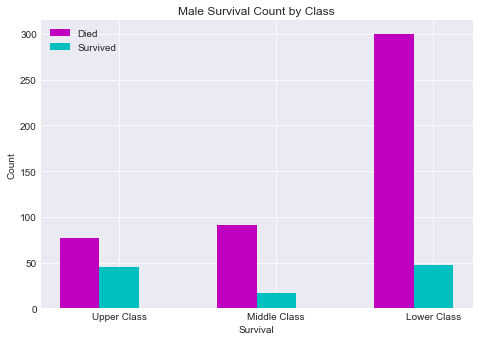

In [ ]:
death_count = [x for x in (train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Pclass==1)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Pclass==2)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Pclass==3)]["Name"].count())]

survival_count = [x for x in (train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Pclass==1)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Pclass==2)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Pclass==3)]["Name"].count())]

data = [death_count, survival_count]

# labels=["Survived(Male)", "Survived(Female)", "Died(Male)", "Died(Female)"]

plt.style.use("seaborn-darkgrid")
fig = plt.figure()
X = np.arange(3)
ax = fig.add_axes([0,0,1,1])
ax.bar(X+0.00, data[0], color='m', width=0.25)
ax.bar(X+0.25, data[1], color='c', width=0.25)
ax.set_xticks([0.25,1.25,2.25])
ax.set_xticklabels(["Upper Class", "Middle Class", "Lower Class"])
ax.set_xlabel("Survival")
ax.set_ylabel("Count")
ax.set_title("Male Survival Count by Class" )
ax.legend(["Died","Survived"])
plt.show()

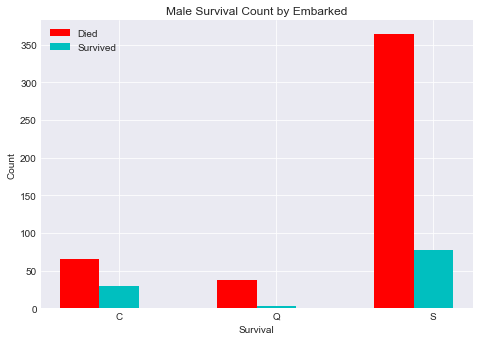

In [ ]:
death_count = [x for x in (train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Embarked=="C")]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Embarked=="Q")]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Embarked=="S")]["Name"].count())]

survival_count = [x for x in (train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Embarked=="C")]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Embarked=="Q")]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Embarked=="S")]["Name"].count())]

data = [death_count, survival_count]

# labels=["Survived(Male)", "Survived(Female)", "Died(Male)", "Died(Female)"]

plt.style.use("seaborn-darkgrid")
fig = plt.figure()
X = np.arange(3)
ax = fig.add_axes([0,0,1,1])
ax.bar(X+0.00, data[0], color='r', width=0.25)
ax.bar(X+0.25, data[1], color='c', width=0.25)
ax.set_xticks([0.25,1.25,2.25])
ax.set_xticklabels(["C", "Q", "S"])
ax.set_xlabel("Survival")
ax.set_ylabel("Count")
ax.set_title("Male Survival Count by Embarked" )
ax.legend(["Died","Survived"])
plt.show()

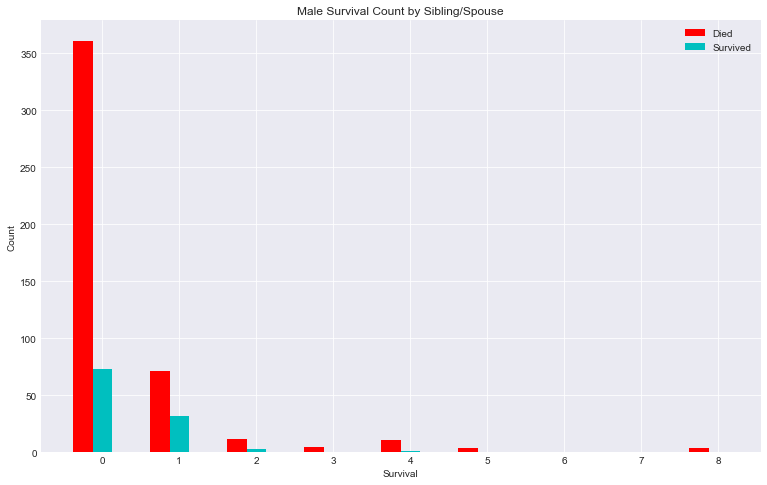

In [ ]:
death_count = [x for x in (train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.SibSp==0)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.SibSp==1)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.SibSp==2)]["Name"].count(),
                          train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.SibSp==3)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.SibSp==4)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.SibSp==5)]["Name"].count(),
                          train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.SibSp==6)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.SibSp==7)]["Name"].count(),
                          train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.SibSp==8)]["Name"].count())]

survival_count = [x for x in (train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.SibSp==0)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.SibSp==1)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.SibSp==2)]["Name"].count(),
                             train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.SibSp==3)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.SibSp==4)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.SibSp==5)]["Name"].count(),
                             train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.SibSp==6)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.SibSp==7)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.SibSp==8)]["Name"].count())]

data = [death_count, survival_count]

# labels=["Survived(Male)", "Survived(Female)", "Died(Male)", "Died(Female)"]

plt.style.use("seaborn-darkgrid")
fig = plt.figure(figsize=(10,6))
X = np.arange(9)
ax = fig.add_axes([0,0,1,1])
ax.bar(X+0.00, data[0], color='r', width=0.25)
ax.bar(X+0.25, data[1], color='c', width=0.25)
ax.set_xticks([0.25,1.25,2.25,3.25,4.25,5.25,6.25,7.25,8.25])
ax.set_xticklabels(["0", "1", "2", "3", "4", "5", "6", "7", "8"])
ax.set_xlabel("Survival")
ax.set_ylabel("Count")
ax.set_title("Male Survival Count by Sibling/Spouse" )
ax.legend(["Died","Survived"])
plt.show()

In [ ]:
train_df2.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

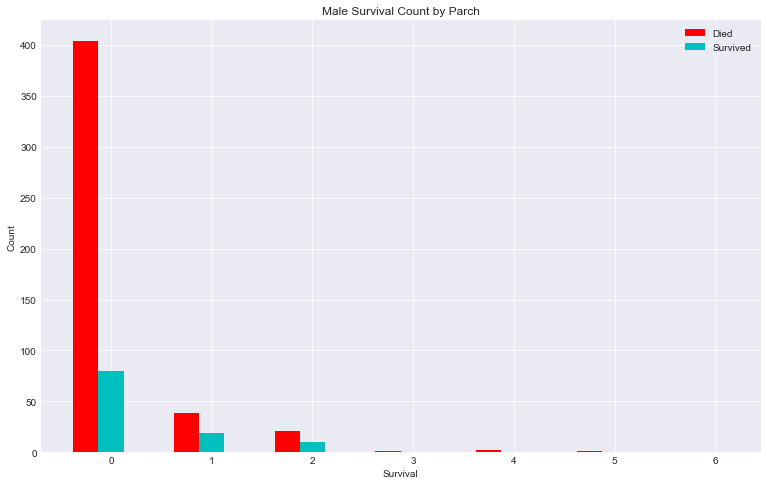

In [ ]:
death_count = [x for x in (train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Parch==0)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Parch==1)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Parch==2)]["Name"].count(),
                          train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Parch==3)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Parch==4)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Parch==5)]["Name"].count(),
                          train_df.loc[(train_df2.Survived==0) & (train_df2.Sex=="male") & (train_df2.Parch==6)]["Name"].count())]

survival_count = [x for x in (train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Parch==0)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Parch==1)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Parch==2)]["Name"].count(),
                             train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Parch==3)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Parch==4)]["Name"].count(),
                              train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Parch==5)]["Name"].count(),
                             train_df.loc[(train_df2.Survived==1) & (train_df2.Sex=="male") & (train_df2.Parch==6)]["Name"].count())]

data = [death_count, survival_count]

# labels=["Survived(Male)", "Survived(Female)", "Died(Male)", "Died(Female)"]

plt.style.use("seaborn-darkgrid")
fig = plt.figure(figsize=(10,6))
X = np.arange(7)
ax = fig.add_axes([0,0,1,1])
ax.bar(X+0.00, data[0], color='r', width=0.25)
ax.bar(X+0.25, data[1], color='c', width=0.25)
ax.set_xticks([0.25,1.25,2.25,3.25,4.25,5.25,6.25])
ax.set_xticklabels(["0", "1", "2", "3", "4", "5", "6"])
ax.set_xlabel("Survival")
ax.set_ylabel("Count")
ax.set_title("Male Survival Count by Parch" )
ax.legend(["Died","Survived"])
plt.show()

In [ ]:
# plt.figure(figsize=(10,6))

# train_df2[train_df2.Survived==1].plot(kind='scatter', x=['Age'], y='Parch', title='Parch Vs Age plot', s=0.5)

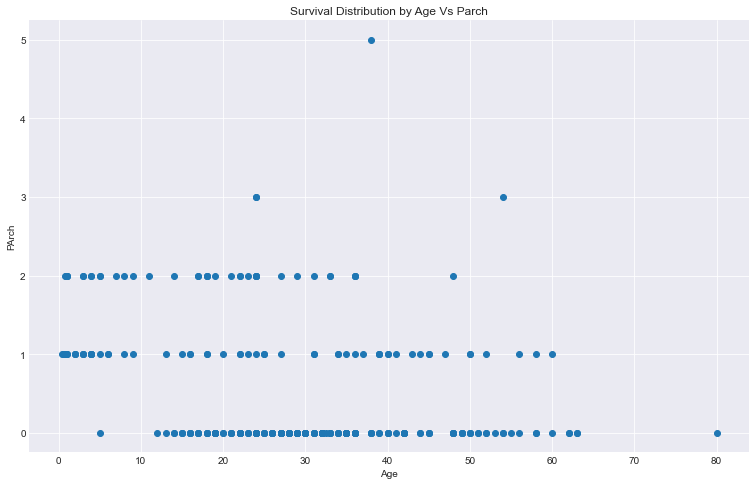

In [ ]:
plt.style.use("seaborn-darkgrid")
fig = plt.figure(figsize=(10,6))

ax = fig.add_axes([0,0,1,1])
ax.scatter( x='Age', y='Parch', data=train_df2[train_df2.Survived==1])
ax.set_xlabel("Age")
ax.set_ylabel("PArch")
ax.set_title("Survival Distribution by Age Vs Parch" )
plt.show()

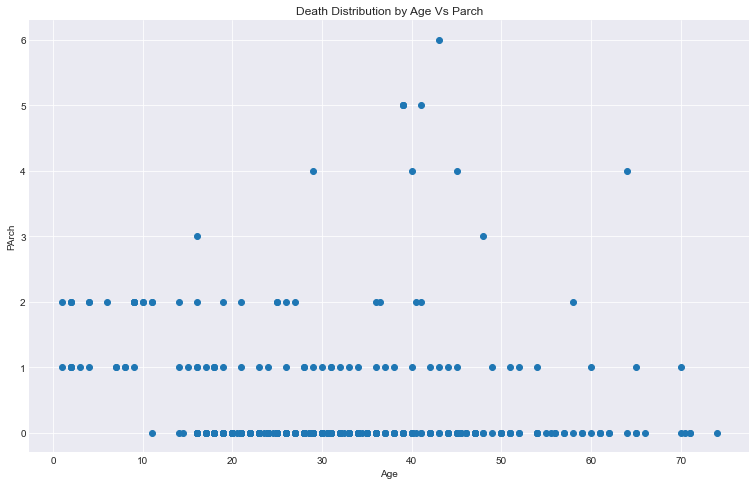

In [ ]:
plt.style.use("seaborn-darkgrid")
fig = plt.figure(figsize=(10,6))

ax = fig.add_axes([0,0,1,1])
ax.scatter( x='Age', y='Parch', data=train_df2[train_df2.Survived==0])
ax.set_xlabel("Age")
ax.set_ylabel("PArch")
ax.set_title("Death Distribution by Age Vs Parch" )
plt.show()

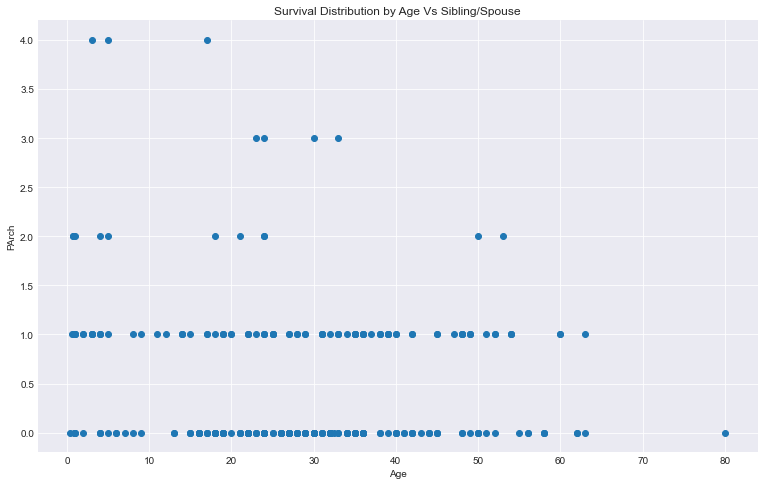

In [ ]:
plt.style.use("seaborn-darkgrid")
fig = plt.figure(figsize=(10,6))

ax = fig.add_axes([0,0,1,1])
ax.scatter( x='Age', y='SibSp', data=train_df2[train_df2.Survived==1])
ax.set_xlabel("Age")
ax.set_ylabel("PArch")
ax.set_title("Survival Distribution by Age Vs Sibling/Spouse" )
plt.show()

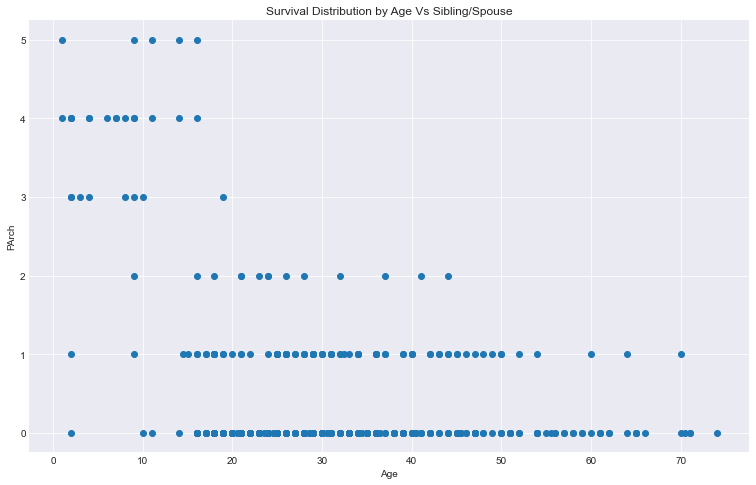

In [ ]:
plt.style.use("seaborn-darkgrid")
fig = plt.figure(figsize=(10,6))

ax = fig.add_axes([0,0,1,1])
ax.scatter( x='Age', y='SibSp', data=train_df2[train_df2.Survived==0])
ax.set_xlabel("Age")
ax.set_ylabel("Parch")
ax.set_title("Death Distribution by Age Vs Sibling/Spouse" )
plt.show()

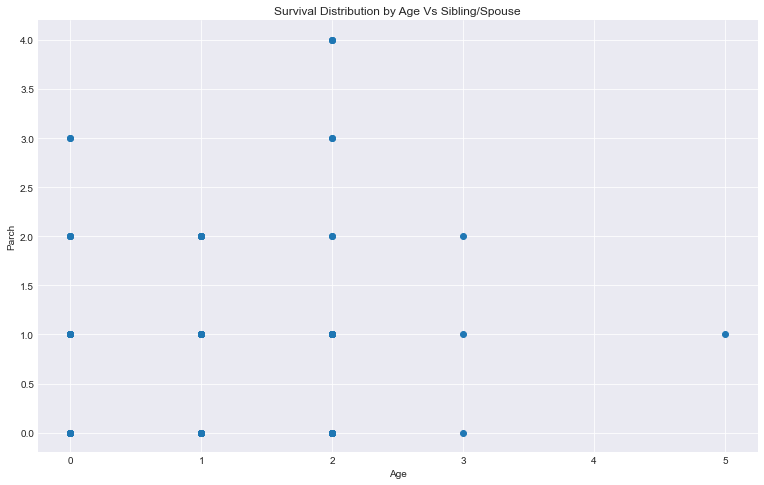

In [ ]:
plt.style.use("seaborn-darkgrid")
fig = plt.figure(figsize=(10,6))

ax = fig.add_axes([0,0,1,1])
ax.scatter( x='Parch', y='SibSp', data=train_df2[train_df2.Survived==1])
ax.set_xlabel("Age")
ax.set_ylabel("Parch")
ax.set_title("Survival Distribution by Age Vs Sibling/Spouse" )
plt.show()